#**Recipe1-Outlier-Trimming**

In [ ]:
!pip install feature_engine

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# boston house dataset for the demo
from sklearn.datasets import load_boston
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [ ]:
def boxplot(data):
  for value in data.columns :
    plt.figure(figsize=(6, 4))
    sns.boxplot(data= data, y=data[value])
    plt.show()

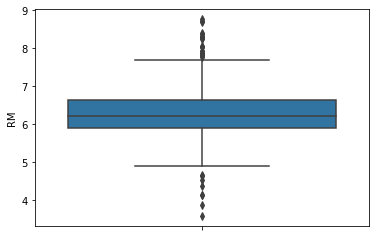

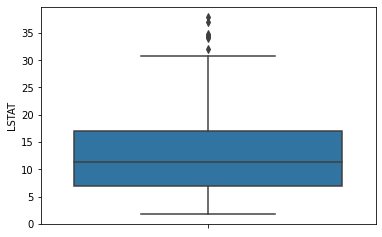

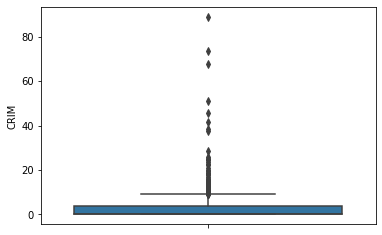

In [ ]:
boxplot(boston)

In [ ]:
def find_boundaries(df, variable, distance):

    # Calculons les limites à l'extérieur desquelles se trouvent les valeurs aberrantes.
    # pour les distributions asymétriques

    # La distance passée en argument nous donne l'option de
    # d'estimer 1,5 fois ou 3 fois l'IQR pour calculer
    # les limites.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM', 1.5)
RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

In [ ]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit

(31.962500000000006, -8.057500000000005)

In [ ]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(9.06963875, -5.31051125)

In [ ]:
# let's flag the outliers in the data set

outliers_RM = np.where(boston['RM'] > RM_upper_limit, True,
                       np.where(boston['RM'] < RM_lower_limit, True, False))

In [ ]:
# let's flag the outliers in the data set

outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit, True,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, True, False))

In [ ]:
# let's flag the outliers in the data set

outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit, True,
                       np.where(boston['CRIM'] < CRIM_lower_limit, True, False))

In [ ]:
# let's trimm the dataset only of outliers in RM

boston_trimmed = boston.loc[~outliers_RM ]

boston.shape, boston_trimmed.shape

((506, 3), (476, 3))

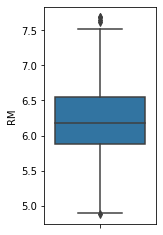

In [ ]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=boston_trimmed['RM'])

In [ ]:
# let's trimm the dataset of outliers across multiple variables

boston_trimmed = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]

boston.shape, boston_trimmed.shape

((506, 3), (416, 3))

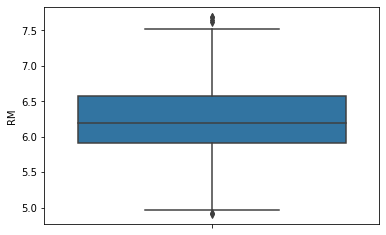

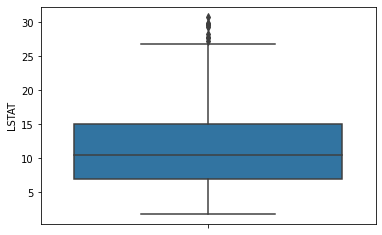

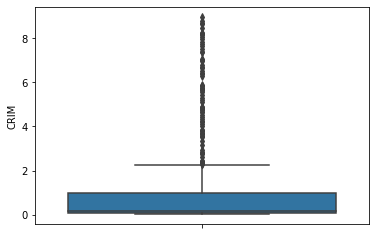

In [ ]:
boxplot(boston_trimmed)

###**There is more section**

In [ ]:
def find_boundaries(df, variable, distance):
    lower_boundary = df[variable].mean() - (df[variable].std() * distance)
    upper_boundary = df[variable].mean() + (df[variable].std() * distance)
    return upper_boundary, lower_boundary

In [ ]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM', 3)
RM_upper_limit, RM_lower_limit

(8.392485817597748, 4.176782957105809)

In [ ]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(boston, 'LSTAT', 3)
LSTAT_upper_limit, LSTAT_lower_limit

(34.07624777515244, -8.770121292938992)

In [ ]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_boundaries(boston, 'CRIM', 3)
CRIM_upper_limit, CRIM_lower_limit

(29.41815887330972, -22.19111175868521)

In [ ]:
# let's flag the outliers in the data set

outliers_RM = np.where(boston['RM'] > RM_upper_limit, True,
                       np.where(boston['RM'] < RM_lower_limit, True, False))

# let's flag the outliers in the data set

outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit, True,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, True, False))

# let's flag the outliers in the data set

outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit, True,
                       np.where(boston['CRIM'] < CRIM_lower_limit, True, False))

In [ ]:
# let's trimm the dataset of outliers across multiple variables

boston_trimmed = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]

boston.shape, boston_trimmed.shape

((506, 3), (487, 3))

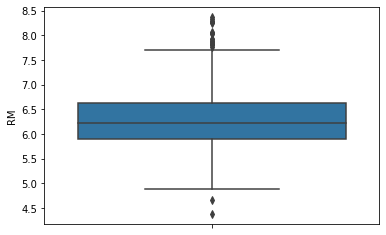

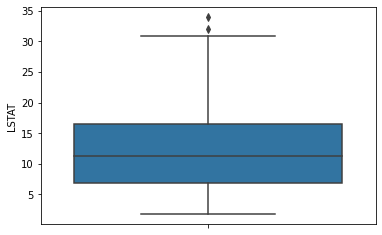

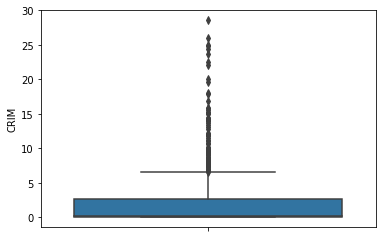

In [ ]:
boxplot(boston_trimmed)

In [ ]:
def find_boundaries(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary

In [ ]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM')
print(RM_upper_limit, RM_lower_limit)

# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(boston, 'LSTAT')
print(LSTAT_upper_limit, LSTAT_lower_limit)

# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_boundaries(boston, 'CRIM')
print(CRIM_upper_limit, CRIM_lower_limit)

7.5875 5.314
26.8075 3.7075
15.78915 0.027909999999999997


In [ ]:
# let's flag the outliers in the data set

outliers_RM = np.where(boston['RM'] > RM_upper_limit, True,
                       np.where(boston['RM'] < RM_lower_limit, True, False))

# let's flag the outliers in the data set

outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit, True,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, True, False))

# let's flag the outliers in the data set

outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit, True,
                       np.where(boston['CRIM'] < CRIM_lower_limit, True, False))

In [ ]:
# let's trimm the dataset of outliers across multiple variables

boston_trimmed = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]

boston.shape, boston_trimmed.shape

((506, 3), (395, 3))

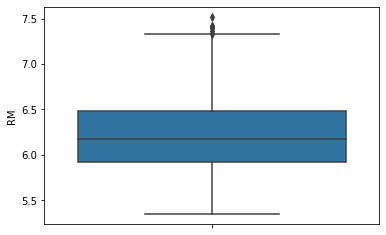

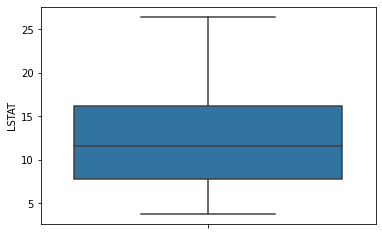

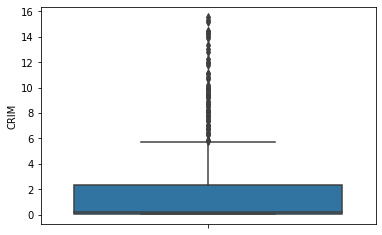

In [ ]:
boxplot(boston_trimmed)

###**Recipe2-Winsorisation**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# boston house dataset for the demo
from sklearn.datasets import load_boston

from feature_engine.outliers import Winsorizer

In [ ]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [ ]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


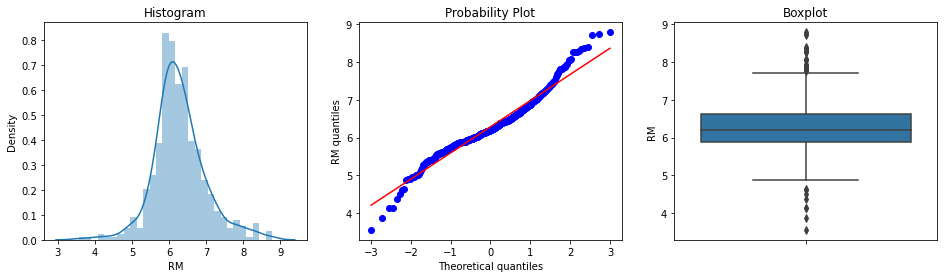

In [ ]:
# let's find outliers in RM

diagnostic_plots(boston, 'RM')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


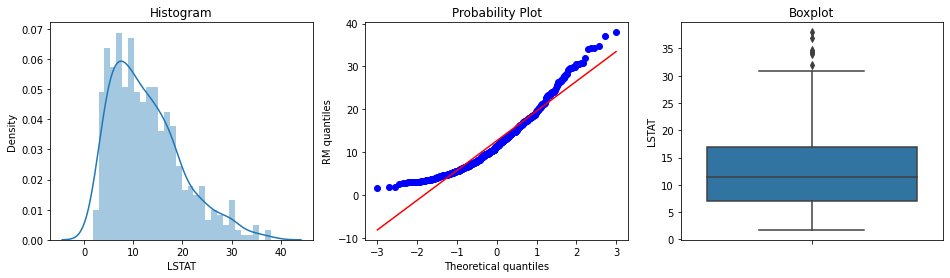

In [ ]:
# visualise outliers in LSTAT

diagnostic_plots(boston, 'LSTAT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


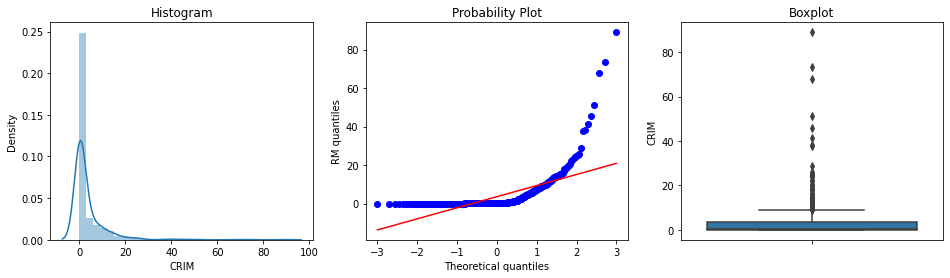

In [ ]:
# outliers in CRIM

diagnostic_plots(boston, 'CRIM')

In [ ]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit,
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [ ]:
# Now let's replace the outliers by the percentiles

boston['RM']= winsorise(boston, 'RM', boston['RM'].quantile(0.95), boston['RM'].quantile(0.05))
boston['LSTAT']= winsorise(boston, 'LSTAT', boston['LSTAT'].quantile(0.95), boston['LSTAT'].quantile(0.05))
boston['CRIM']= winsorise(boston, 'CRIM', boston['CRIM'].quantile(0.95), boston['CRIM'].quantile(0.05))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


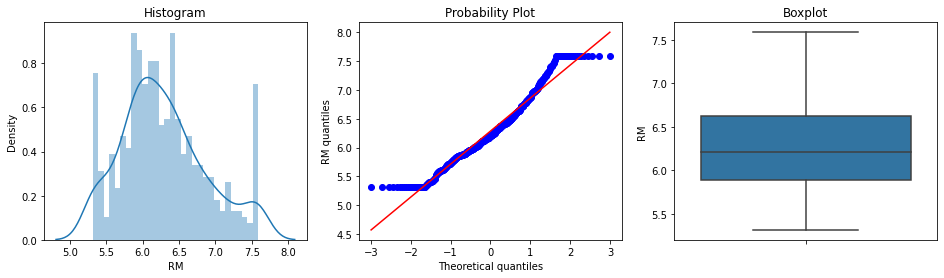

In [ ]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


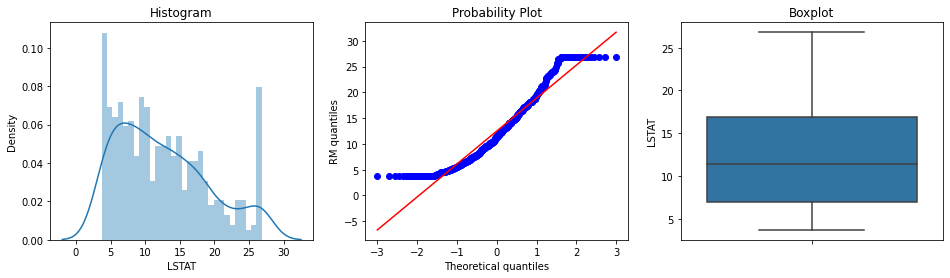

In [ ]:
diagnostic_plots(boston, 'LSTAT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


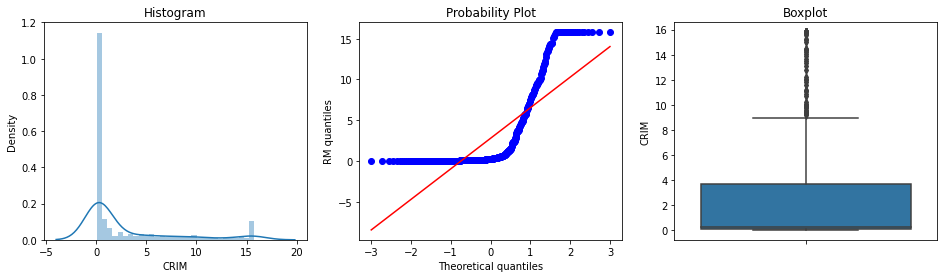

In [ ]:
diagnostic_plots(boston, 'CRIM')

###**Censoring with feature-engine**

In [ ]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [ ]:
# create the capper

windsorizer = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['RM', 'LSTAT', 'CRIM'])
###capping_method='gaussian', tail='right', fold=3, variables=['age', 'fare']
windsorizer.fit(boston)

Winsorizer(tail='both', variables=['RM', 'LSTAT', 'CRIM'])

In [ ]:
boston_t = windsorizer.transform(boston)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


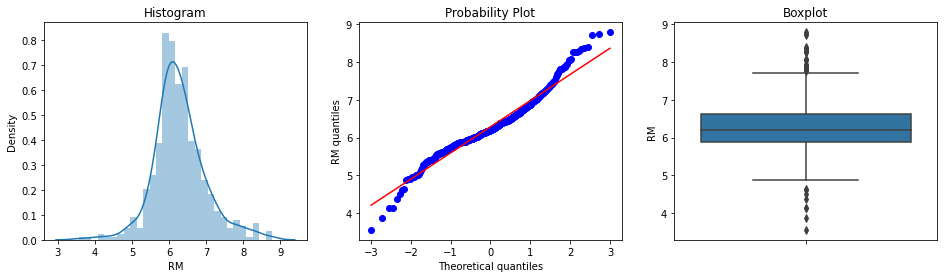

In [ ]:
diagnostic_plots(boston, 'RM')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


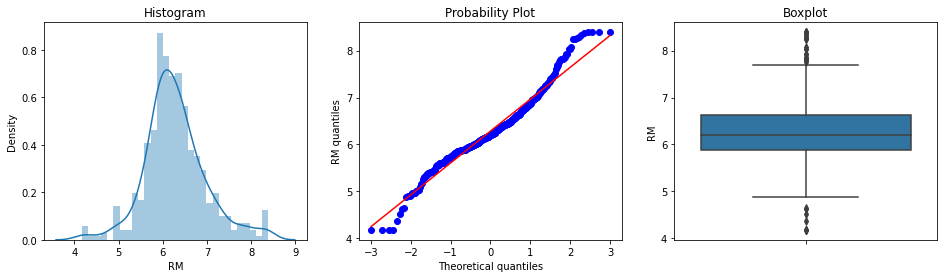

In [ ]:
diagnostic_plots(boston_t, 'RM')

In [ ]:
# we can inspect the minimum caps for each variable
windsorizer.left_tail_caps_

{'CRIM': -22.19111175868521,
 'LSTAT': -8.770121292938992,
 'RM': 4.176782957105809}

In [ ]:
# we can inspect the maximum caps for each variable
windsorizer.right_tail_caps_

{'CRIM': 29.41815887330972,
 'LSTAT': 34.07624777515244,
 'RM': 8.392485817597748}

###**Recipe3-Capping**

In [ ]:
import pandas as pd
import numpy as np

# boston house dataset for the demo
from sklearn.datasets import load_boston

from feature_engine.outliers import Winsorizer
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [ ]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [ ]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_normal_boundaries(boston, 'RM', 3)
RM_upper_limit, RM_lower_limit

(8.392485817597748, 4.176782957105809)

In [ ]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_normal_boundaries(boston, 'LSTAT', 3)
LSTAT_upper_limit, LSTAT_lower_limit

(34.07624777515244, -8.770121292938992)

In [ ]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_normal_boundaries(boston, 'CRIM', 3)
CRIM_upper_limit, CRIM_lower_limit

(29.41815887330972, -22.19111175868521)

In [ ]:
# Now let's replace the outliers by the maximum and minimum limit

boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

In [ ]:
# Now let's replace the outliers by the maximum and minimum limit

boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

In [ ]:
# Now let's replace the outliers by the maximum and minimum limit

boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))

###**Censoring with feature-engine**

In [ ]:
# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [ ]:
# create the capper

windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian
                          tail='both', # cap left, right or both tails
                          fold=3, variables=['RM', 'LSTAT', 'CRIM'])

windsorizer.fit(boston)

Winsorizer(tail='both', variables=['RM', 'LSTAT', 'CRIM'])

In [ ]:
boston_t = windsorizer.transform(boston)

In [ ]:
# we can inspect the minimum caps for each variable
windsorizer.left_tail_caps_

{'CRIM': -22.19111175868521,
 'LSTAT': -8.770121292938992,
 'RM': 4.176782957105809}

In [ ]:
# we can inspect the maximum caps for each variable
windsorizer.right_tail_caps_

{'CRIM': 29.41815887330972,
 'LSTAT': 34.07624777515244,
 'RM': 8.392485817597748}

###**Recipe4-Zero-coding**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from feature_engine.outliers import ArbitraryOutlierCapper

In [ ]:
# let's create a data frame with a normal distributed variable x

np.random.seed(29) # for reproducibility

n = 200 # in the book we pass directly 200 within brackets, without defining n
x = np.random.randn(n) + 2
y = np.random.randn(n) * 2 + 4
z = np.random.randn(n) * 5 + 10

data = pd.DataFrame([x, y, z]).T
data.columns = ['x', 'y', 'z']

data.head()

,x,y,z
0,1.582518,6.903260,9.695655
1,2.706032,4.930279,14.363733
2,3.915985,4.688840,15.803355
3,-0.141755,3.488652,17.403682
4,2.719057,2.388501,20.859069


In [ ]:
data.min()

x   -1.505401
y   -0.901451
z   -1.552986
dtype: float64

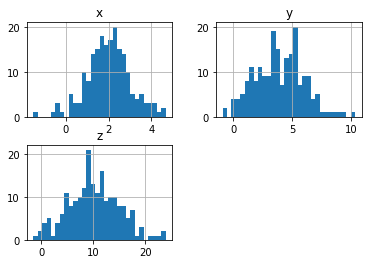

In [ ]:
data.hist(bins=30)
plt.show()

In [ ]:
data.loc[data['x'] < 0, 'x'] = 0
data.loc[data['y'] < 0, 'y'] = 0
data.loc[data['z'] < 0, 'z'] = 0

data.min()

x    0.0
y    0.0
z    0.0
dtype: float64

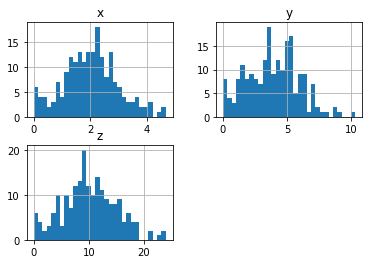

In [ ]:
data.hist(bins=30)
plt.show()

###**Zero coding with feature-engine**

In [ ]:
# let's create a data frame with a normal distributed variable x

np.random.seed(29) # for reproducibility

n = 200 # in the book we pass directly 200 within brackets, without defining n
x = np.random.randn(n) + 2
y = np.random.randn(n) * 2 + 4
z = np.random.randn(n) * 5 + 10

data = pd.DataFrame([x, y, z]).T
data.columns = ['x', 'y', 'z']

data.head()

,x,y,z
0,1.582518,6.903260,9.695655
1,2.706032,4.930279,14.363733
2,3.915985,4.688840,15.803355
3,-0.141755,3.488652,17.403682
4,2.719057,2.388501,20.859069


In [ ]:
# create the capper

windsoriser = ArbitraryOutlierCapper(max_capping_dict=None,
                                     min_capping_dict={'x':0, 'y':0, 'z':0})

windsoriser.fit(data)

ArbitraryOutlierCapper(min_capping_dict={'x': 0, 'y': 0, 'z': 0})

In [ ]:
data_t = windsoriser.transform(data)

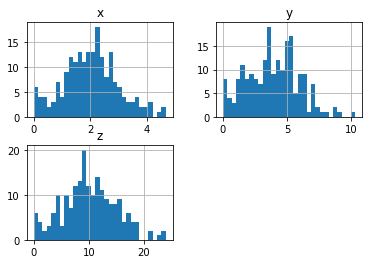

In [ ]:
data_t.hist(bins=30)
plt.show()

In [ ]:
# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

{'x': 0, 'y': 0, 'z': 0}

In [ ]:
# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

{}